In [1]:
import pandas as pd
from pandas import *
import numpy as np
import time
import matplotlib.pyplot as plt
import matplotlib.dates as md
import datetime as dt

import warnings
import itertools
import statsmodels.api as sm
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.arima_model import ARIMAResults
from sklearn.metrics import mean_squared_error

In [2]:
test = pd.read_csv('E:/University of Bremen MSc/masters_thesis/IAT_sebastian/dataset_26_april_3.csv')
# data = pd.read_csv('AirPassengers.csv')
# print (data.head())
# print ('\n Data Types:')
# print (data.dtypes)
# print(type(data))

In [3]:
import datetime
longTime=test.loc[0:,['longTime']]
longTime=longTime.as_matrix()
a=[]
date_time_array=[]
for k in longTime:
    a=np.append(a,k)
str_time=[]
correct_longtime=[]
datetime_time=[]
count=0
for b in a:
    b=int(b) # make plain integer
    str_b=str(b)
    c=str_b[-3:]
    new_str_b=str_b.replace(c, '',1)
    new_str_b_time=int(new_str_b)
    correct_longtime.append(new_str_b_time)
    now_time=datetime.datetime.fromtimestamp(new_str_b_time)
    convert_time=now_time.strftime('%Y-%m-%d %H:%M')
    str_time.append(convert_time)
# print(str_time)
test_new = test.assign(stringTime=str_time,correct_longtime=correct_longtime) # here new column in the panda dataframe for string_time has added

C:\Users\atif\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until


In [4]:
test_new['dateTime'] =  pd.to_datetime(test_new['stringTime'], format='%Y-%m-%d %H:%M')

In [5]:
test_new = test_new.set_index('dateTime') # make dataTime column as index of the dataframe test_new

In [6]:
univariate_column_label=['AEDAHO_T9_V2']
univariate_data_set=test_new.iloc[3000:7000][univariate_column_label] #just for checking whether it is working or not
print(univariate_data_set.head())

                     AEDAHO_T9_V2
dateTime                         
2019-04-08 19:00:00     64.064304
2019-04-08 18:59:00     62.083996
2019-04-08 18:58:00     58.627314
2019-04-08 18:57:00     58.332788
2019-04-08 18:56:00     58.751344


In [7]:
univariate_data=univariate_data_set.loc[::-1]
print(univariate_data.head())

                     AEDAHO_T9_V2
dateTime                         
2019-04-06 00:21:00     72.427071
2019-04-06 00:22:00     71.620643
2019-04-06 00:23:00     70.606738
2019-04-06 00:24:00     70.531626
2019-04-06 00:25:00     70.692115


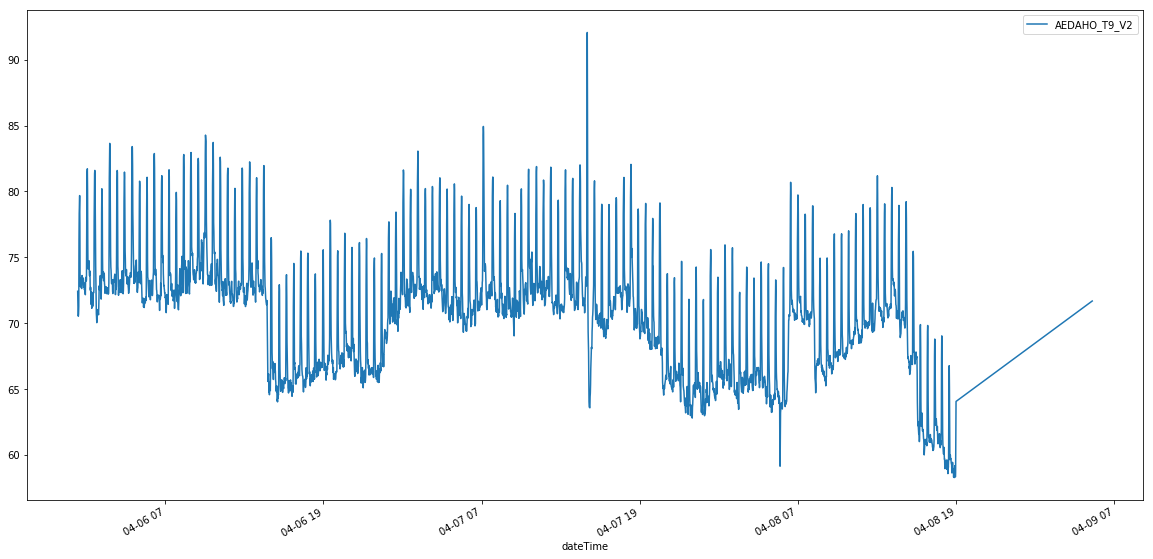

In [9]:
univariate_data.plot()
plt.rcParams['figure.figsize'] =(20,10)
plt.show()

In [83]:
# dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m')
# # dateparse('1962-01')
# data = pd.read_csv('AirPassengers.csv', parse_dates=['Month'], index_col='Month',date_parser=dateparse)
# print (data.head())

In [10]:
test_new.index

DatetimeIndex(['2019-04-15 08:52:00', '2019-04-15 08:51:00',
               '2019-04-15 08:50:00', '2019-04-15 08:49:00',
               '2019-04-15 08:48:00', '2019-04-15 08:47:00',
               '2019-04-15 08:46:00', '2019-04-15 08:45:00',
               '2019-04-15 08:44:00', '2019-04-15 08:43:00',
               ...
               '2019-03-11 03:23:00', '2019-03-11 03:22:00',
               '2019-03-11 03:21:00', '2019-03-11 03:20:00',
               '2019-03-11 03:19:00', '2019-03-11 03:18:00',
               '2019-03-11 03:17:00', '2019-03-11 03:16:00',
               '2019-03-11 03:15:00', '2019-03-11 03:14:00'],
              dtype='datetime64[ns]', name='dateTime', length=25000, freq=None)

In [11]:
ts = univariate_data['AEDAHO_T9_V2']
# ts = univariate_data
ts.head(10)

dateTime
2019-04-06 00:21:00    72.427071
2019-04-06 00:22:00    71.620643
2019-04-06 00:23:00    70.606738
2019-04-06 00:24:00    70.531626
2019-04-06 00:25:00    70.692115
2019-04-06 00:26:00    71.287597
2019-04-06 00:27:00    76.285867
2019-04-06 00:28:00    78.329860
2019-04-06 00:29:00    79.178653
2019-04-06 00:30:00    79.688625
Name: AEDAHO_T9_V2, dtype: float64

(array([737155.29166667, 737155.79166667, 737156.29166667, 737156.79166667,
        737157.29166667, 737157.79166667, 737158.29166667]),
 <a list of 7 Text xticklabel objects>)

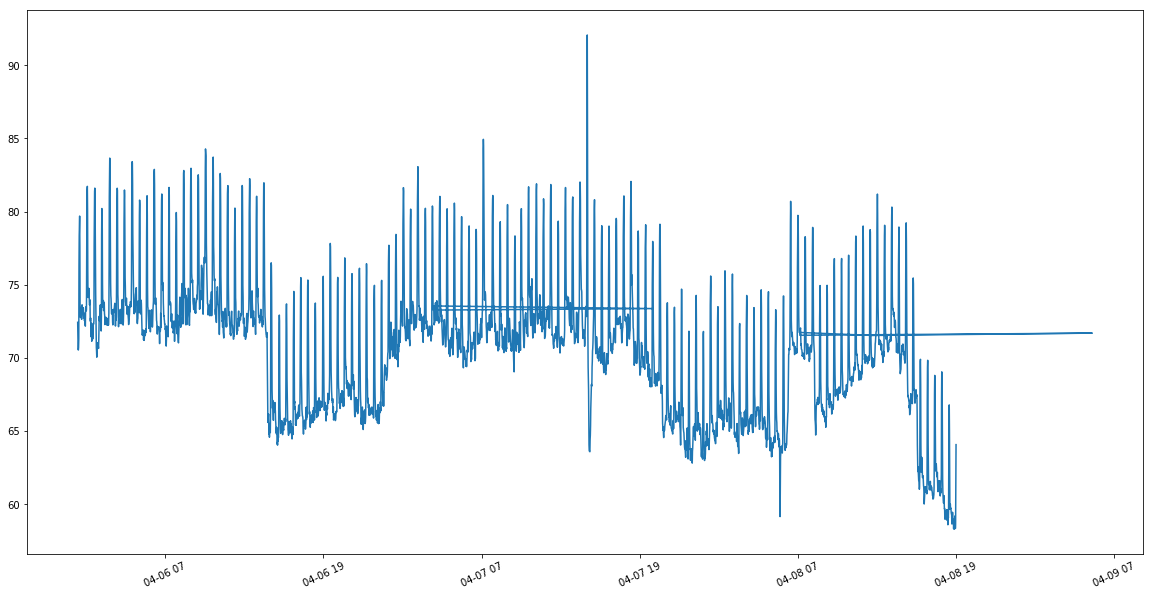

In [13]:
plt.plot(ts)
plt.xticks( rotation=25)

(array([737155.29166667, 737155.79166667, 737156.29166667, 737156.79166667,
        737157.29166667, 737157.79166667, 737158.29166667]),
 <a list of 7 Text xticklabel objects>)

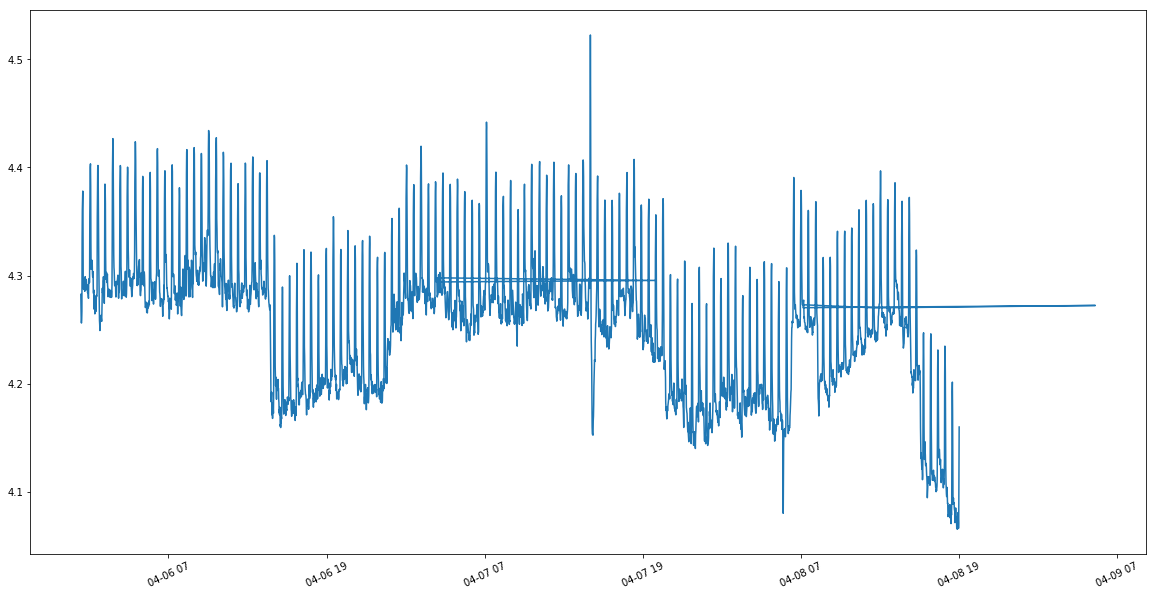

In [14]:
ts_log = np.log(ts)
plt.plot(ts_log)
plt.xticks( rotation=25)

(array([737155.29166667, 737155.79166667, 737156.29166667, 737156.79166667,
        737157.29166667, 737157.79166667, 737158.29166667]),
 <a list of 7 Text xticklabel objects>)

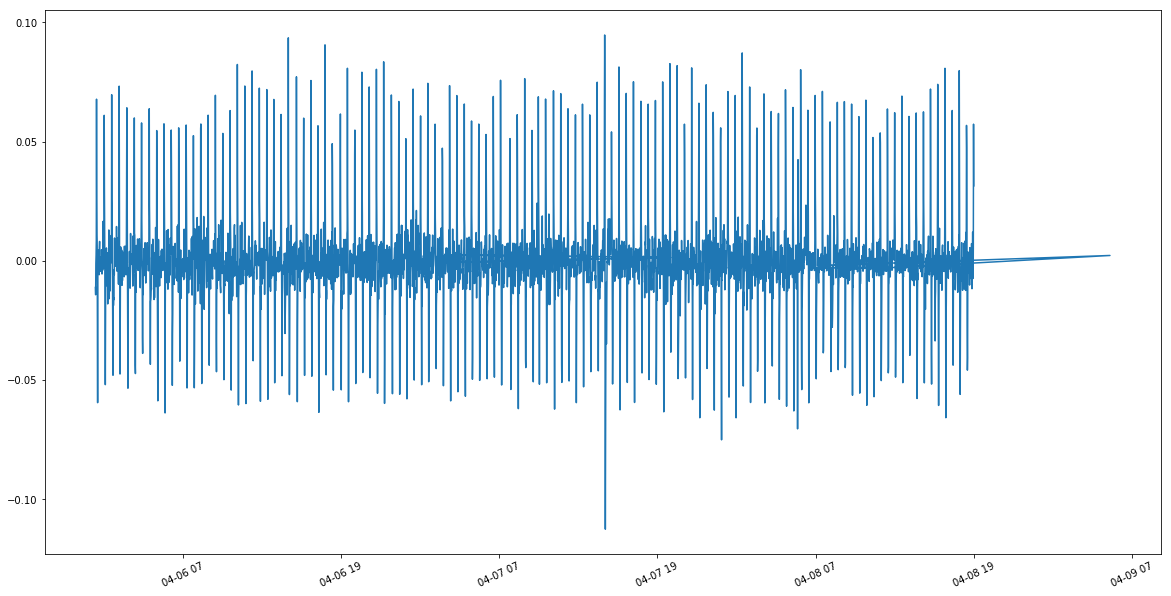

In [16]:
ts_log_diff = ts_log - ts_log.shift()
plt.plot(ts_log_diff)
plt.xticks( rotation=25)

In [17]:
ts_log_diff.dropna(inplace=True)

In [20]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=12).mean()
    rolstd = timeseries.rolling(window=12).std()

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.xticks( rotation=25)
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

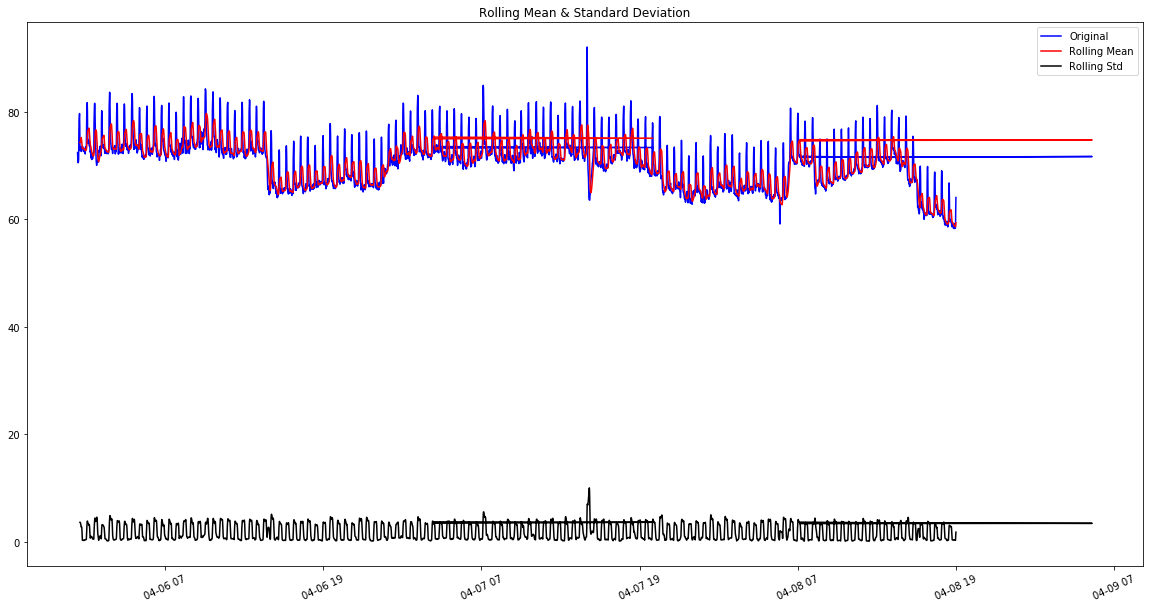

Results of Dickey-Fuller Test:
Test Statistic                    0.415861
p-value                           0.982078
#Lags Used                       31.000000
Number of Observations Used    3968.000000
Critical Value (1%)              -3.431999
Critical Value (5%)              -2.862269
Critical Value (10%)             -2.567158
dtype: float64


In [21]:
test_stationarity(ts)

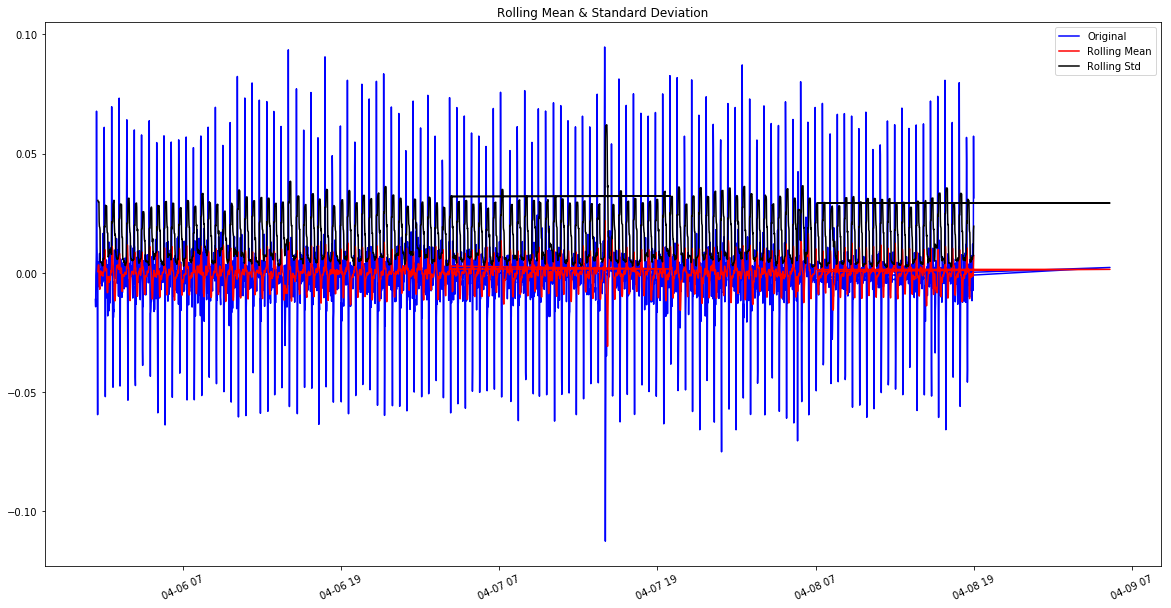

Results of Dickey-Fuller Test:
Test Statistic                  -28.467938
p-value                           0.000000
#Lags Used                       31.000000
Number of Observations Used    3967.000000
Critical Value (1%)              -3.431999
Critical Value (5%)              -2.862269
Critical Value (10%)             -2.567158
dtype: float64


In [22]:
test_stationarity(ts_log_diff)

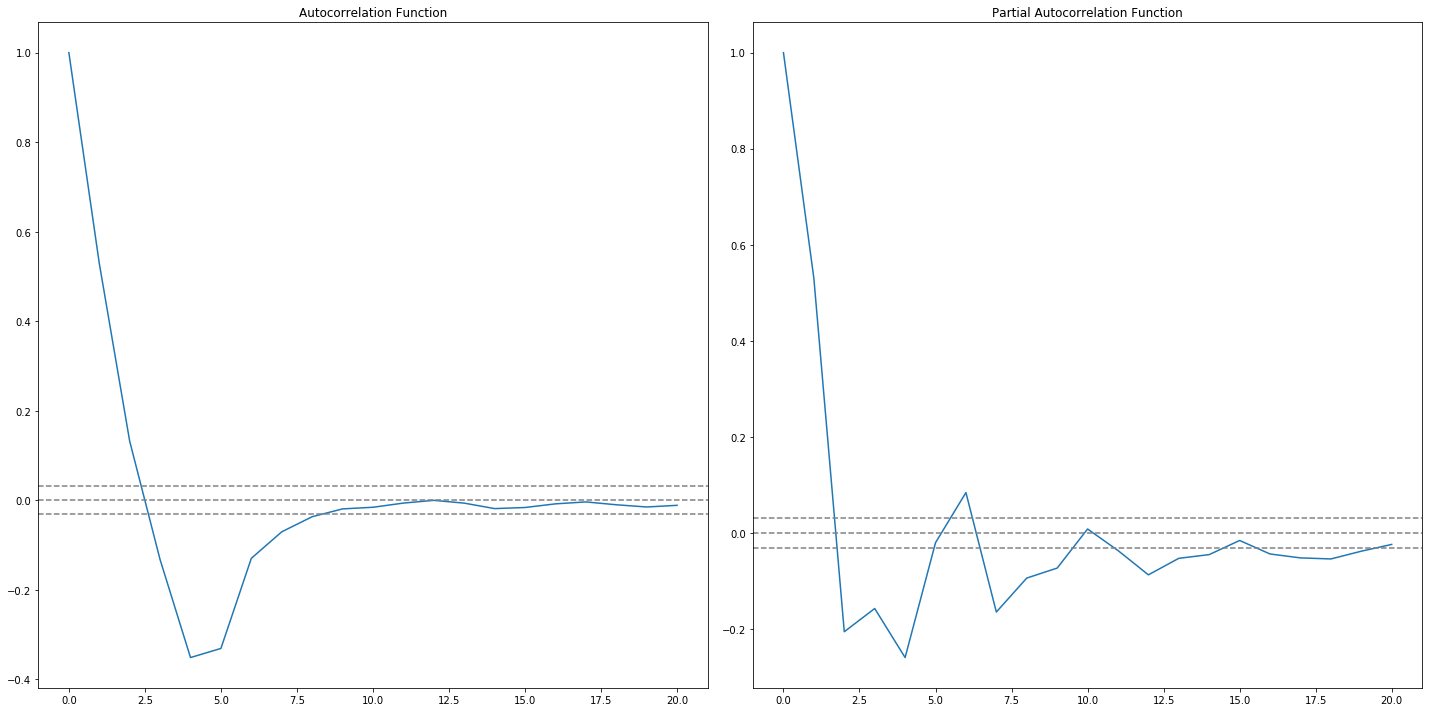

In [23]:
#ACF and PACF plots:
from statsmodels.tsa.stattools import acf, pacf  

lag_acf = acf(ts_log_diff, nlags=20)
lag_pacf = pacf(ts_log_diff, nlags=20, method='ols')

#Plot ACF:    
plt.subplot(121)    
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

#Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

C:\Users\atif\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\atif\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


(array([737155.29166667, 737155.79166667, 737156.29166667, 737156.79166667,
        737157.29166667, 737157.79166667, 737158.29166667]),
 <a list of 7 Text xticklabel objects>)

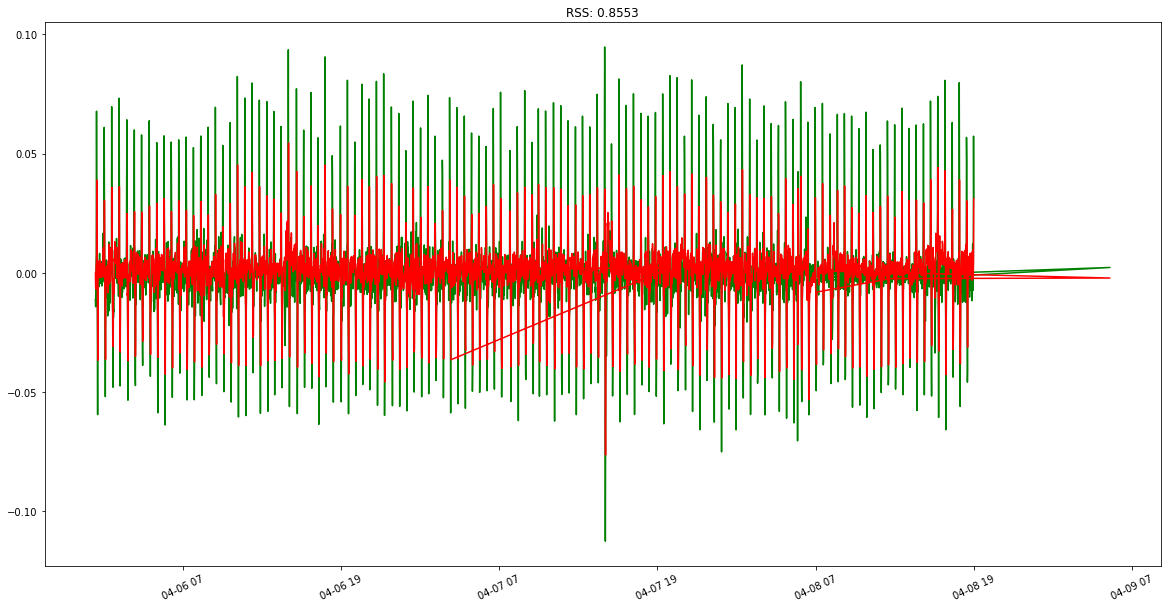

In [33]:
from statsmodels.tsa.arima_model import ARIMA

model = ARIMA(ts_log, order=(2, 1, 2))
results_ARIMA = model.fit(disp=-1)
plt.plot(ts_log_diff, color ='green')
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_ARIMA.fittedvalues-ts_log_diff)**2))
plt.xticks( rotation=25)

In [25]:
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)
print (predictions_ARIMA_diff.head())

dateTime
2019-04-06 00:22:00   -0.000050
2019-04-06 00:23:00   -0.005955
2019-04-06 00:24:00   -0.006833
2019-04-06 00:25:00    0.002545
2019-04-06 00:26:00    0.003790
dtype: float64


In [26]:
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
print (predictions_ARIMA_diff_cumsum.head())

dateTime
2019-04-06 00:22:00   -0.000050
2019-04-06 00:23:00   -0.006005
2019-04-06 00:24:00   -0.012838
2019-04-06 00:25:00   -0.010293
2019-04-06 00:26:00   -0.006503
dtype: float64


In [27]:
predictions_ARIMA_log = pd.Series(ts_log.ix[0], index=ts_log.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value=0)
print(predictions_ARIMA_log.head())

C:\Users\atif\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


dateTime
2019-04-06 00:21:00    4.282580
2019-04-06 00:22:00    4.282530
2019-04-06 00:23:00    4.276575
2019-04-06 00:24:00    4.269742
2019-04-06 00:25:00    4.272287
dtype: float64


Text(0.5,1,'ts_log and predictions_ARIMA_log graph')

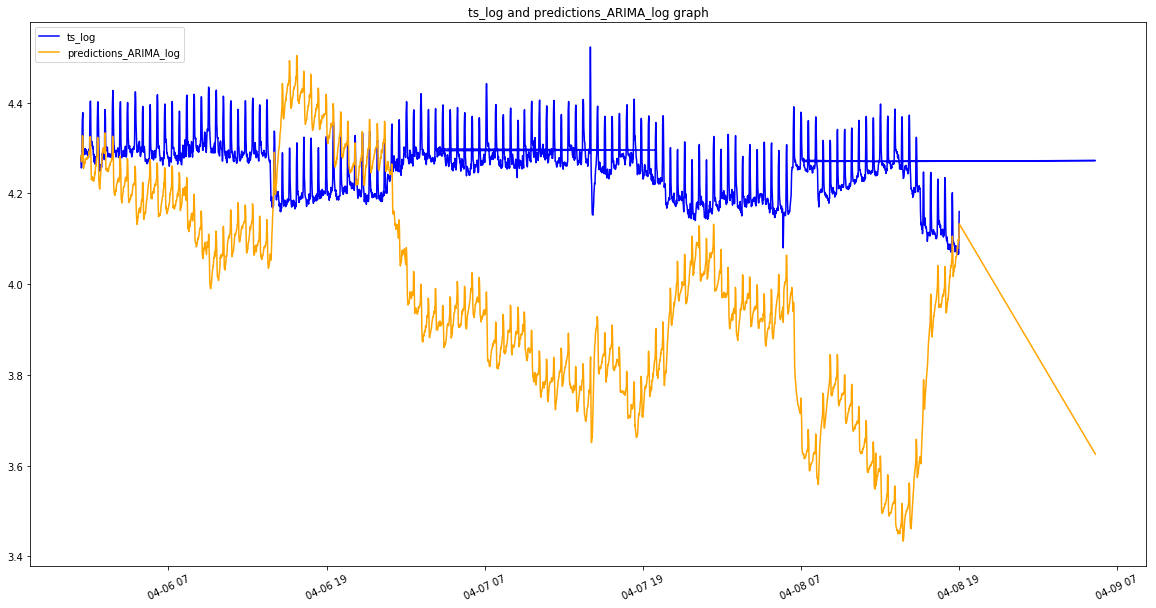

In [32]:
plt.plot(ts_log, color ='blue')
plt.plot(predictions_ARIMA_log, color ='orange')
plt.xticks( rotation=25)
plt.legend(['ts_log', 'predictions_ARIMA_log'], loc='upper left')
plt.title('ts_log and predictions_ARIMA_log graph')

Text(0.5,1,'RMSE: 20.8290')

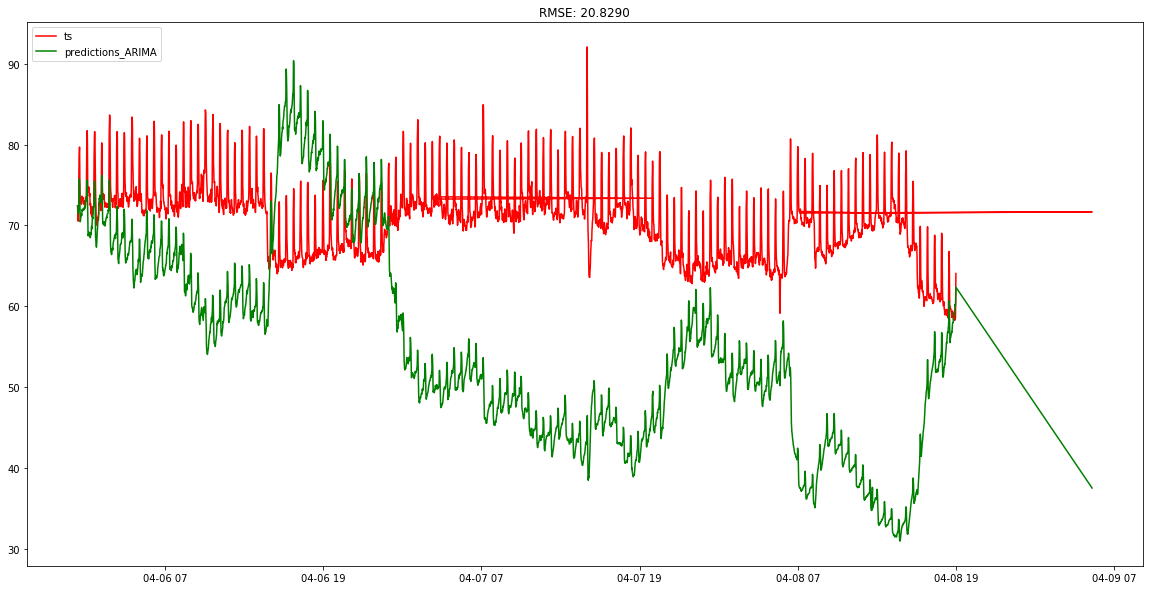

In [30]:
predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.plot(ts, color = 'red')
plt.plot(predictions_ARIMA, color ='green')
plt.legend(['ts','predictions_ARIMA'], loc='upper left')
plt.title('RMSE: %.4f'% np.sqrt(sum((predictions_ARIMA-ts)**2)/len(ts)))

In [34]:
print(type(ts),'\t', ts.shape)
print(type(ts_log),'\t',ts_log.shape)
print(type(ts_log_diff),'\t',ts_log_diff.shape)

<class 'pandas.core.series.Series'> 	 (4000,)
<class 'pandas.core.series.Series'> 	 (4000,)
<class 'pandas.core.series.Series'> 	 (3999,)


In [35]:
print(type(predictions_ARIMA_diff),'\t',predictions_ARIMA_diff.shape)
print(type(predictions_ARIMA_diff_cumsum),'\t',predictions_ARIMA_diff_cumsum.shape)
print(type(predictions_ARIMA_log),'\t',predictions_ARIMA_log.shape)
print(type(predictions_ARIMA),'\t',predictions_ARIMA.shape)

<class 'pandas.core.series.Series'> 	 (3999,)
<class 'pandas.core.series.Series'> 	 (3999,)
<class 'pandas.core.series.Series'> 	 (4004,)
<class 'pandas.core.series.Series'> 	 (4004,)


In [36]:
print(type(ts_log))
ts_log

<class 'pandas.core.series.Series'>


dateTime
2019-04-06 00:21:00    4.282580
2019-04-06 00:22:00    4.271383
2019-04-06 00:23:00    4.257126
2019-04-06 00:24:00    4.256061
2019-04-06 00:25:00    4.258334
2019-04-06 00:26:00    4.266722
2019-04-06 00:27:00    4.334488
2019-04-06 00:28:00    4.360929
2019-04-06 00:29:00    4.371707
2019-04-06 00:30:00    4.378127
2019-04-06 00:31:00    4.351190
2019-04-06 00:32:00    4.291672
2019-04-06 00:33:00    4.288372
2019-04-06 00:34:00    4.287087
2019-04-06 00:35:00    4.291568
2019-04-06 00:36:00    4.295758
2019-04-06 00:37:00    4.296620
2019-04-06 00:38:00    4.291257
2019-04-06 00:39:00    4.285411
2019-04-06 00:40:00    4.290823
2019-04-06 00:41:00    4.298939
2019-04-06 00:42:00    4.295135
2019-04-06 00:43:00    4.294753
2019-04-06 00:44:00    4.295999
2019-04-06 00:45:00    4.294748
2019-04-06 00:46:00    4.296349
2019-04-06 00:47:00    4.291895
2019-04-06 00:48:00    4.288598
2019-04-06 00:49:00    4.286621
2019-04-06 00:50:00    4.291290
                         ...   

C:\Users\atif\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:531: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)
C:\Users\atif\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:531: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)
C:\Users\atif\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:531: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


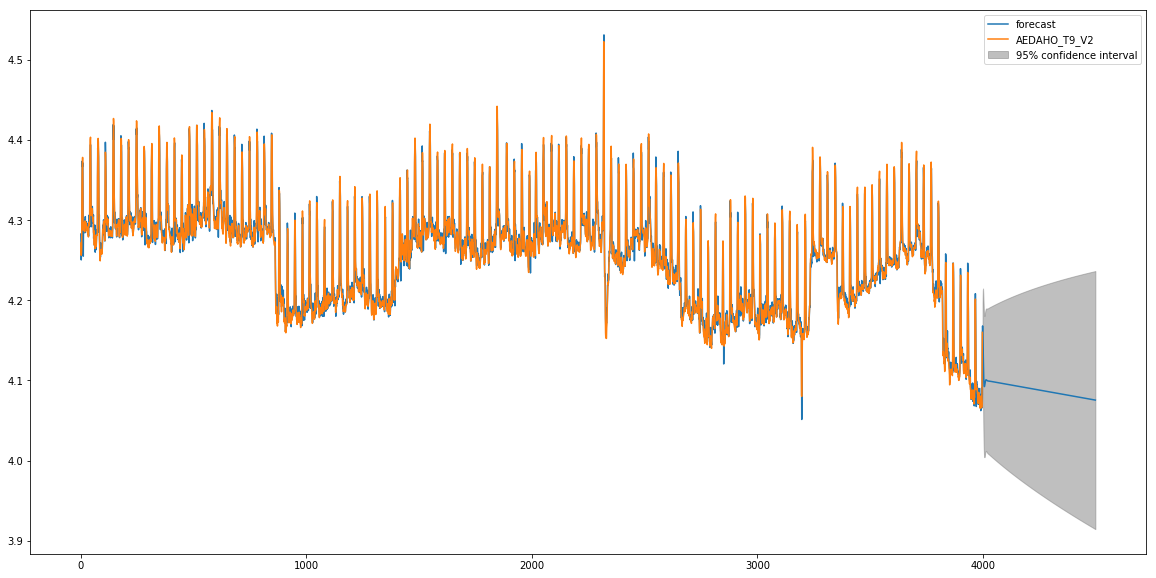

In [40]:
results_ARIMA.plot_predict(1,4500)# 260 came how? look former output, 200 row. 200 + how many step??
x=results_ARIMA.forecast(steps=500)

In [41]:
def make_dataset(PandaDataframe):
    dataset = np.array(PandaDataframe)

    NumberOfElements = int(len(dataset)*0.9)
    print('dataset length: ',len(dataset))
    print('Number of Elements for training: ',NumberOfElements)

    train_data = dataset[0:NumberOfElements]
    test_data = dataset[NumberOfElements:len(dataset)]
    
    return train_data, test_data

train_set, test_set = make_dataset(predictions_ARIMA)
print('train_set shape: ', train_set.shape)
print('test_set shape: ', test_set.shape)

dataset length:  4004
Number of Elements for training:  3603
train_set shape:  (3603,)
test_set shape:  (401,)


In [42]:
Actual = [x for x in train_set]
Predictions = list()

#Function that calls ARIMA model to fit and forecast the data
def StartARIMAForecasting(Actual, P, D, Q):
    model = ARIMA(Actual, order=(P, D, Q))
    model_fit = model.fit(disp=0)
    prediction = model_fit.forecast()[0]
    return prediction

In [43]:
count_1=1
for timepoint in range(len(test_set)):
#     print('I am in for loop')
    ActualValue =  test_set[timepoint]
    #forcast value
    Prediction = StartARIMAForecasting(Actual, 2,1,2)
    print('count=%d, Actual=%f, Predicted=%f' % (count_1 ,ActualValue, Prediction))
    count_1+=1
    #add it in the list
    Predictions.append(Prediction)
    Actual.append(ActualValue)

count=1, Actual=36.838829, Predicted=36.918438
count=2, Actual=36.885356, Predicted=36.775755
count=3, Actual=36.909297, Predicted=36.891718
count=4, Actual=36.936385, Predicted=36.927841
count=5, Actual=38.144833, Predicted=36.949604
count=6, Actual=38.568318, Predicted=38.824748
count=7, Actual=38.171060, Predicted=38.847626
count=8, Actual=37.504021, Predicted=37.772660
count=9, Actual=36.085631, Predicted=36.915701
count=10, Actual=35.073211, Predicted=35.239941
count=11, Actual=34.909987, Predicted=34.589703
count=12, Actual=34.771795, Predicted=35.085428
count=13, Actual=34.785547, Predicted=34.989800
count=14, Actual=34.808167, Predicted=34.907180
count=15, Actual=34.795141, Predicted=34.818506
count=16, Actual=35.063420, Predicted=34.745461
count=17, Actual=37.629716, Predicted=35.183346
count=18, Actual=35.070958, Predicted=39.100239
count=19, Actual=37.629716, Predicted=33.709099
count=20, Actual=35.070958, Predicted=38.350920
count=21, Actual=35.042766, Predicted=34.092793
c

count=171, Actual=34.174724, Predicted=33.796348
count=172, Actual=35.188970, Predicted=34.394448
count=173, Actual=35.227969, Predicted=35.725455
count=174, Actual=34.952825, Predicted=35.272113
count=175, Actual=34.142098, Predicted=34.583080
count=176, Actual=32.893306, Predicted=33.543334
count=177, Actual=32.297376, Predicted=32.210467
count=178, Actual=32.112812, Predicted=32.079135
count=179, Actual=31.902309, Predicted=32.289685
count=180, Actual=31.990936, Predicted=32.002498
count=181, Actual=31.852137, Predicted=32.036376
count=182, Actual=32.054917, Predicted=31.739480
count=183, Actual=32.364235, Predicted=32.097246
count=184, Actual=32.597461, Predicted=32.561491
count=185, Actual=32.864391, Predicted=32.750664
count=186, Actual=33.103213, Predicted=32.955040
count=187, Actual=33.384296, Predicted=33.161380
count=188, Actual=33.519016, Predicted=33.479699
count=189, Actual=33.866451, Predicted=33.565368
count=190, Actual=33.975647, Predicted=34.003910
count=191, Actual=34

count=339, Actual=52.273594, Predicted=53.181977
count=340, Actual=51.424516, Predicted=51.253681
count=341, Actual=51.243921, Predicted=51.258009
count=342, Actual=51.337273, Predicted=51.639431
count=343, Actual=51.465503, Predicted=51.684330
count=344, Actual=51.695228, Predicted=51.516339
count=345, Actual=52.014105, Predicted=51.666554
count=346, Actual=52.484852, Predicted=52.107723
count=347, Actual=52.461084, Predicted=52.743033
count=348, Actual=52.570082, Predicted=52.465484
count=349, Actual=52.902450, Predicted=52.516384
count=350, Actual=52.870491, Predicted=53.029555
count=351, Actual=53.284995, Predicted=52.889893
count=352, Actual=53.685643, Predicted=53.458961
count=353, Actual=54.015887, Predicted=53.912370
count=354, Actual=54.394649, Predicted=54.166054
count=355, Actual=54.649472, Predicted=54.518603
count=356, Actual=55.059829, Predicted=54.721715
count=357, Actual=55.548302, Predicted=55.217660
count=358, Actual=55.429691, Predicted=55.790761
count=359, Actual=55

In [44]:
print('Actual type: ',type(Actual),' size: ',len(Actual))
print('Predictions type: ',type(Predictions),' size: ',len(Predictions))
print('test_set type: ',type(test_set),' size: ',len(test_set))

Actual type:  <class 'list'>  size:  4004
Predictions type:  <class 'list'>  size:  401
test_set type:  <class 'numpy.ndarray'>  size:  401


In [45]:
from sklearn.metrics import mean_squared_error

#Print MSE to see how good the model is
Error = mean_squared_error(test_set, Predictions)
# Error = mean_squared_error(ts, predictions_ARIMA)
print('Test Mean Squared Error (smaller the better fit): %.3f' % Error)

print("size of prediction: ",len(Predictions))
print("size of actual: ",len(Actual))

Test Mean Squared Error (smaller the better fit): 1.956
size of prediction:  401
size of actual:  4004


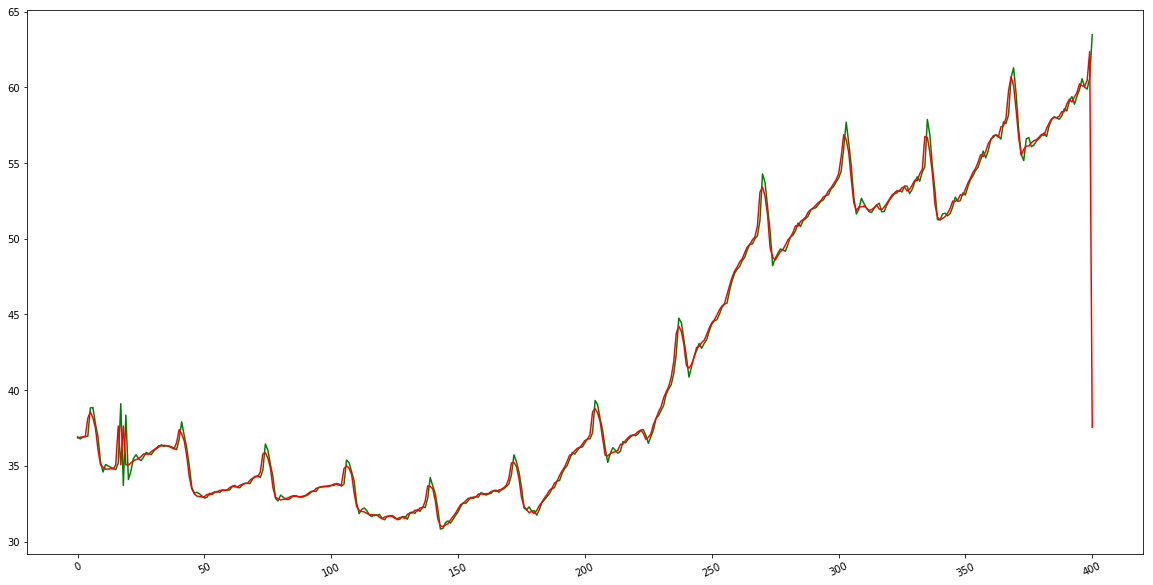

In [46]:
plt.plot(Predictions,color='green')
plt.plot(test_set,color='red')
plt.xticks( rotation=25)
plt.legend(['pred', 'test_op'], loc='upper left')
plt.rcParams['figure.figsize'] =(20,10)
plt.show()

# Prediction directly with the raw_data

In [47]:
def make_dataset(PandaDataframe):
    dataset = np.array(PandaDataframe)

    NumberOfElements = int(len(dataset)*0.9)
    print('dataset length: ',len(dataset))
    print('Number of Elements for training: ',NumberOfElements)

    train_data = dataset[0:NumberOfElements]
    test_data = dataset[NumberOfElements:len(dataset)]
    
    return train_data, test_data

train_set, test_set = make_dataset(univariate_data)
print('train_set shape: ', train_set.shape)
print('test_set shape: ', test_set.shape)

dataset length:  4000
Number of Elements for training:  3600
train_set shape:  (3600, 1)
test_set shape:  (400, 1)


In [48]:
Actual = [x for x in train_set]
Predictions = list()

#Function that calls ARIMA model to fit and forecast the data
def StartARIMAForecasting(Actual, P, D, Q):
    model = ARIMA(Actual, order=(P, D, Q))
    model_fit = model.fit(disp=0)
    prediction = model_fit.forecast()[0]
    return prediction

In [49]:
count_1=1
for timepoint in range(len(test_set)):
#     print('I am in for loop')
    ActualValue =  test_set[timepoint]
    #forcast value
    Prediction = StartARIMAForecasting(Actual, 2,1,2)
    print('count=%d, Actual=%f, Predicted=%f' % (count_1 ,ActualValue, Prediction))
    count_1+=1
    #add it in the list
    Predictions.append(Prediction)
    Actual.append(ActualValue)

count=1, Actual=69.987634, Predicted=70.150077
count=2, Actual=70.117312, Predicted=70.060615
count=3, Actual=69.810326, Predicted=70.221396
count=4, Actual=69.854234, Predicted=69.671977
count=5, Actual=69.854876, Predicted=69.954782
count=6, Actual=69.867973, Predicted=69.909498
count=7, Actual=74.460529, Predicted=69.929711
count=8, Actual=77.821813, Predicted=76.807846
count=9, Actual=78.759842, Predicted=78.677327
count=10, Actual=78.583303, Predicted=77.981160
count=11, Actual=74.974737, Predicted=77.236572
count=12, Actual=71.707049, Predicted=72.006174
count=13, Actual=70.991142, Predicted=69.622528
count=14, Actual=70.329795, Predicted=70.671929
count=15, Actual=70.093558, Predicted=70.040960
count=16, Actual=69.862708, Predicted=70.120458
count=17, Actual=69.432343, Predicted=69.905845
count=18, Actual=70.005736, Predicted=69.406395
count=19, Actual=69.785416, Predicted=70.550147
count=20, Actual=69.313838, Predicted=69.796560
count=21, Actual=69.400243, Predicted=69.263699
c

count=171, Actual=76.103167, Predicted=72.494161
count=172, Actual=78.167314, Predicted=78.321733
count=173, Actual=79.223717, Predicted=78.285141
count=174, Actual=77.982175, Predicted=78.669711
count=175, Actual=74.089863, Predicted=76.176631
count=176, Actual=71.812331, Predicted=71.262698
count=177, Actual=70.813192, Predicted=70.520764
count=178, Actual=69.498722, Predicted=70.437329
count=179, Actual=69.108666, Predicted=69.061056
count=180, Actual=67.715367, Predicted=69.345700
count=181, Actual=67.346626, Predicted=67.452526
count=182, Actual=67.423790, Predicted=67.843195
count=183, Actual=67.264712, Predicted=68.134032
count=184, Actual=67.215024, Predicted=67.808633
count=185, Actual=67.076492, Predicted=67.830992
count=186, Actual=67.095235, Predicted=67.630917
count=187, Actual=66.574478, Predicted=67.735770
count=188, Actual=66.747295, Predicted=66.914310
count=189, Actual=66.111887, Predicted=67.521594
count=190, Actual=66.374704, Predicted=66.400340
count=191, Actual=66

count=339, Actual=61.708579, Predicted=61.183839
count=340, Actual=60.870566, Predicted=60.714244
count=341, Actual=60.526995, Predicted=60.680092
count=342, Actual=60.214362, Predicted=60.659732
count=343, Actual=60.070565, Predicted=60.384689
count=344, Actual=60.125130, Predicted=60.362083
count=345, Actual=60.581433, Predicted=60.518987
count=346, Actual=60.072489, Predicted=61.150696
count=347, Actual=59.675758, Predicted=60.052658
count=348, Actual=59.704517, Predicted=59.824884
count=349, Actual=58.969607, Predicted=60.109398
count=350, Actual=58.994899, Predicted=58.948972
count=351, Actual=59.073987, Predicted=59.494453
count=352, Actual=59.045487, Predicted=59.543894
count=353, Actual=59.130865, Predicted=59.433813
count=354, Actual=59.001320, Predicted=59.572142
count=355, Actual=59.177986, Predicted=59.300874
count=356, Actual=59.616828, Predicted=59.650071
count=357, Actual=58.914272, Predicted=60.168366
count=358, Actual=58.910545, Predicted=58.796002
count=359, Actual=59

In [50]:
print('Actual type: ',type(Actual),' size: ',len(Actual))
print('Predictions type: ',type(Predictions),' size: ',len(Predictions))
print('test_set type: ',type(test_set),' size: ',len(test_set))

Actual type:  <class 'list'>  size:  4000
Predictions type:  <class 'list'>  size:  400
test_set type:  <class 'numpy.ndarray'>  size:  400


In [51]:
from sklearn.metrics import mean_squared_error

#Print MSE to see how good the model is
Error = mean_squared_error(test_set, Predictions)
# Error = mean_squared_error(ts, predictions_ARIMA)
print('Test Mean Squared Error (smaller the better fit): %.3f' % Error)

print("size of prediction: ",len(Predictions))
print("size of actual: ",len(Actual))

Test Mean Squared Error (smaller the better fit): 0.954
size of prediction:  400
size of actual:  4000


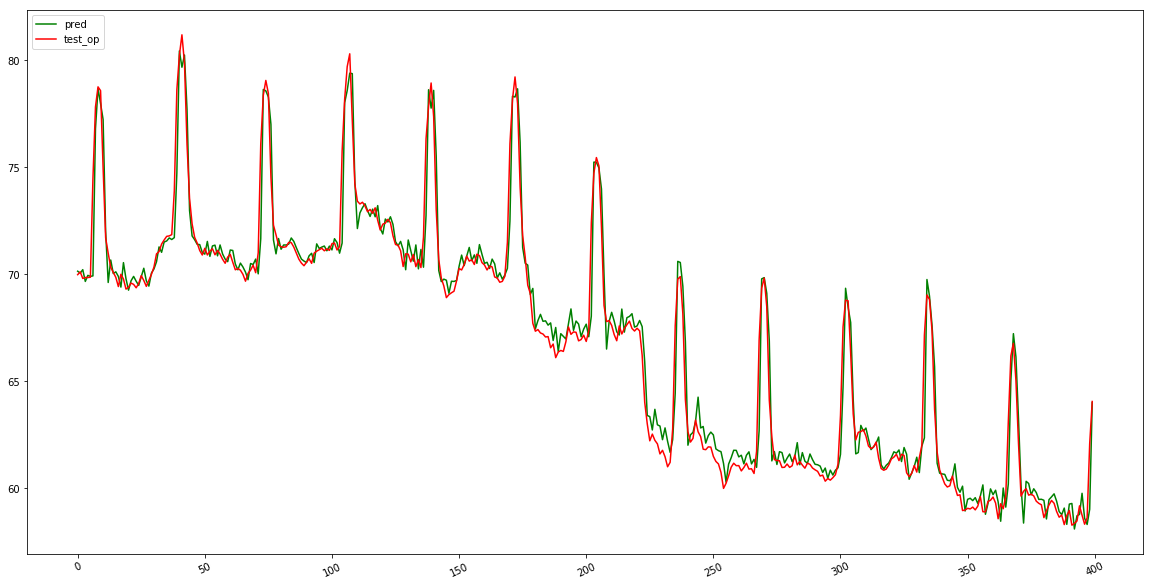

In [52]:
plt.plot(Predictions,color='green')
plt.plot(test_set,color='red')
plt.xticks( rotation=25)
plt.legend(['pred', 'test_op'], loc='upper left')
plt.rcParams['figure.figsize'] =(20,10)
plt.show()

In [53]:
u = univariate_data.iloc[3500:4000][univariate_column_label]

In [54]:
type(u)

pandas.core.frame.DataFrame

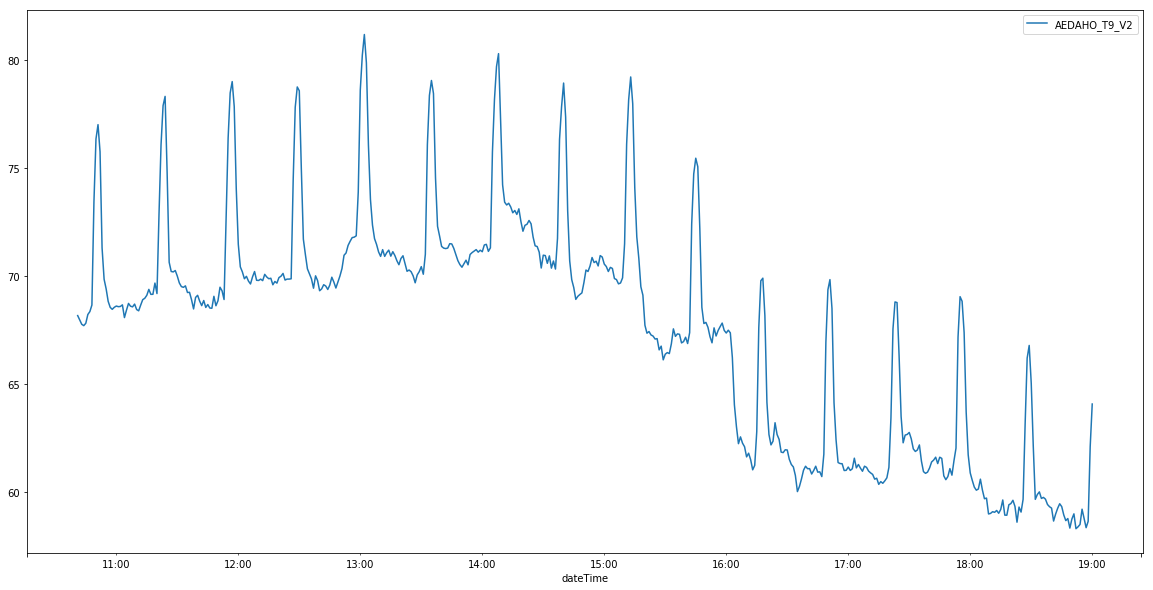

In [55]:
u.plot()